<a href="https://colab.research.google.com/github/Shriniwas18K/Mini-Projects/blob/main/computer%20vision%20and%20deep%20learning%20/%20LSTM_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade keras-nlp
!pip install --upgrade keras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 548.4/548.4 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 39.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 47.3 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1


In [ ]:
import pandas as pd
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from keras.api.models import Sequential
from keras.api.layers import Embedding,LSTM,Dense,Flatten,Activation
from keras.api.optimizers import Adam
from keras.api.losses import SparseCategoricalCrossentropy
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import keras_nlp
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_parquet("hf://datasets/TimKoornstra/financial-tweets-sentiment/data/train-00000-of-00001.parquet")
df.drop(["url"], axis=1, inplace=True)
df=df.sample(frac=0.01)
df.head()

,tweet,sentiment
20440,$EYES run out of cash -$30 Million debt so for\n,2
31332,$AFOM moving!@!@\n.002 journey begins tomorrow...,1
20675,@manpreetkailon just adding $BTC dip after thi...,2
37777,Diageo Shares Surge on Report of Possible Take...,1
31353,$CATV massive revs soon. see pics below. \n\n$...,1


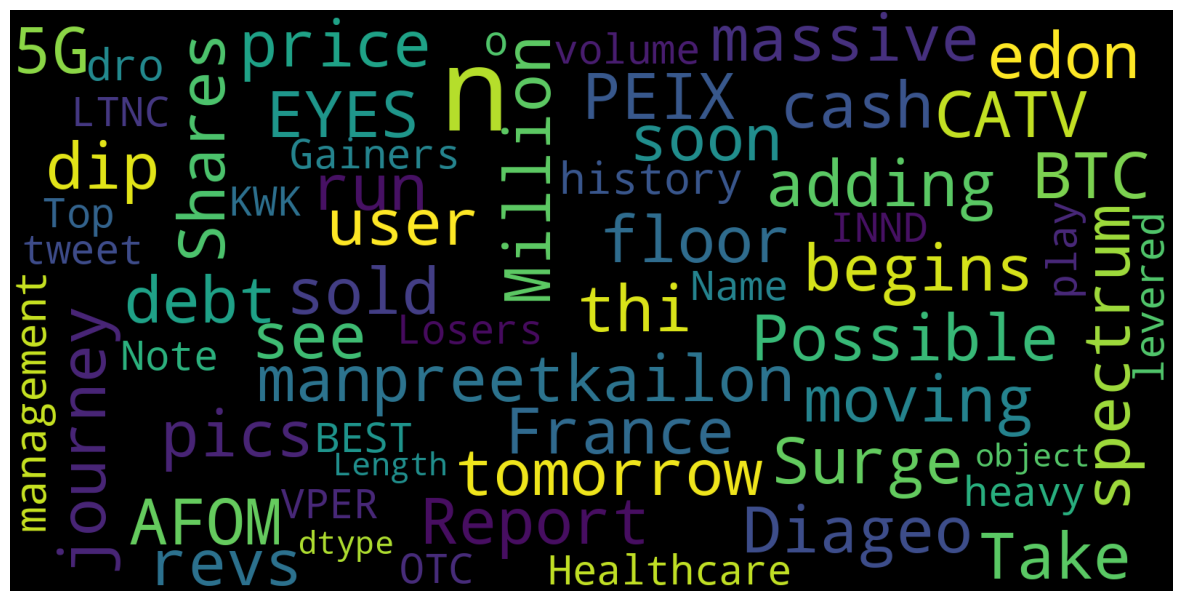

In [ ]:
def generate_wordcloud(data, title = None):
    wordcloud = WordCloud(
        stopwords=stopwords,
        max_words=100,
        max_font_size=40,
        scale=4).generate(str(data))
    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    plt.imshow(wordcloud)
    plt.show()
generate_wordcloud(df["tweet"])

<Axes: xlabel='sentiment', ylabel='count'>

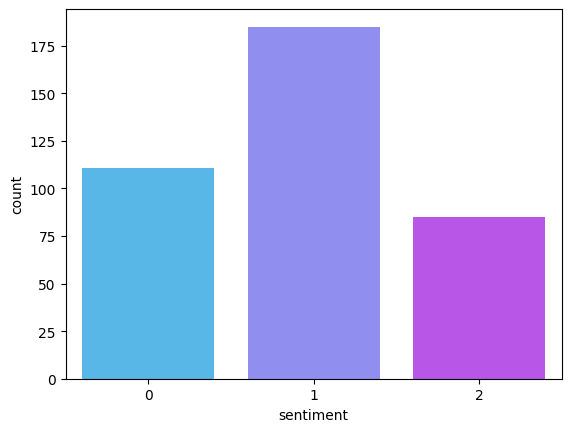

In [ ]:
sns.categorical.countplot(x="sentiment", data=df,palette='cool')

In [ ]:
num_words = 100
vocabulary_size = 20000
tokenizer = Tokenizer(num_words= vocabulary_size, filters='')
tokenizer.fit_on_texts(df['tweet'])
sequences = tokenizer.texts_to_sequences(df['tweet'])
data = pad_sequences(sequences, maxlen= num_words)
print(data)

[[   0    0    0 ...  318  140  637]
 [   0    0    0 ...    8  647  648]
 [   0    0    0 ...  653   52  324]
 ...
 [   0    0    0 ...  597  396 2890]
 [   0    0    0 ... 2891 2892 2893]
 [   0    0    0 ...    3  317   26]]


In [ ]:
embed_dim = 128
lstm_out = 196
X=data
Y=pd.get_dummies(df['sentiment']).values
print(X.shape,Y.shape)
model = Sequential()
model.add(Embedding(vocabulary_size, embed_dim,input_length = X.shape[1]))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

(381, 100) (381, 3)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.33, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(255, 100) (255, 3)
(126, 100) (126, 3)


In [ ]:
model.fit(X_train, Y_train, verbose = 2)

8/8 - 3s - 408ms/step - accuracy: 0.4824 - loss: 1.0723


In [ ]:
score,acc = model.evaluate(X_test, Y_test, verbose = 2)
print("score: %.2f" % (score))
print("acc: %.2f" % (acc))

4/4 - 0s - 104ms/step - accuracy: 0.4603 - loss: 1.0559
score: 1.06
acc: 0.46


In [ ]:
import numpy as np
pred=model.predict(X_test[2].reshape(1,X_test.shape[1]))
if np.argmax(pred)==0:
    print("negative")
elif np.argmax(pred)==1:
    print("neutral")
elif np.argmax(pred)==2:
    print("positive")
tokenizer.sequences_to_texts([X_test[2],])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
neutral


['reunion gold announces change in fiscal year-end https://t.co/w6lauhy5ly']